In [1]:
import pandas as pd 
df = pd.read_csv('loan_data_set.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df['Dependents'].replace('3+', 3,inplace=True)
df['Loan_Status'].replace('N', 0,inplace=True)
df['Loan_Status'].replace('Y', 1,inplace=True)
df['Gender'].replace('Male', 1,inplace=True)
df['Gender'].replace('Female', 0,inplace=True)
df['Married'].replace('Yes', 1,inplace=True)
df['Married'].replace('No', 0,inplace=True)
df['Education'].replace('Graduate', 1,inplace=True)
df['Education'].replace('Not Graduate', 0,inplace=True)
df['Self_Employed'].replace('Yes', 1,inplace=True)
df['Self_Employed'].replace('No', 0,inplace=True)

df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)


df = df.drop('Loan_ID',axis=1)

C:\Users\ya313\AppData\Local\Temp\ipykernel_19616\3488823227.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].replace('3+', 3,inplace=True)
C:\Users\ya313\AppData\Local\Temp\ipykernel_19616\3488823227.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [9]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

Loan_Status
1    422
0    192
Name: count, dtype: int64
[1, 0]


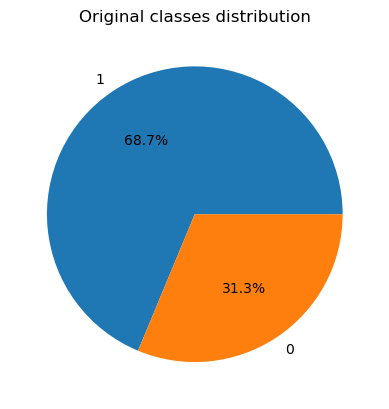

In [15]:
import matplotlib.pyplot as plt

count_values= y.value_counts()
print(count_values)

labels = count_values.index.to_list()
print(labels)

plt.title('Original classes distribution')
plt.pie(x = count_values, labels = labels, autopct = '%1.1f%%')
plt.show()

Before resampling:  614
After resampling:  844


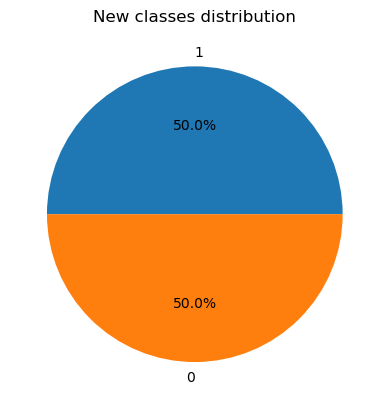

In [19]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE ()
print("Before resampling: ", len(X))
X,y = oversample.fit_resample(X, y)
print("After resampling: ", len(X))

count_values=y.value_counts()

labels = count_values.index.to_list()

plt.title('New classes distribution')

plt.pie(x=count_values, labels = labels, autopct = '%1.1f%%')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
y_pred=tree.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('\nAccuracy: {:.3f}\n'.format(250*accuracy_score(y_test, y_pred)))

print('\nPrecision: {:.3f}\n'.format(250*precision_score(y_test, y_pred)))

print('\nRecall: {:.3f}\n'.format(250*recall_score(y_test, y_pred)))

print('\nF1: {:.3f}\n'.format(250*f1_score(y_test, y_pred)))


Accuracy: 187.870


Precision: 196.629


Recall: 188.172


F1: 192.308



<Axes: >

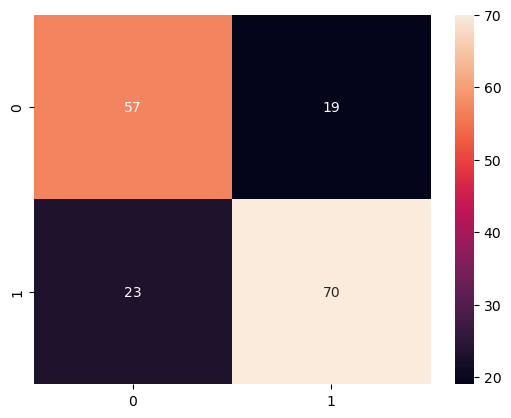

In [49]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)